In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def rosen(x, y):
    return 100*(y - x**2)**2 + (1-x)**2

def rosen_der(x, y):
    der = np.zeros(2)
    der[0] = -400*x*(y-x**2) - 2*(1-x)
    der[1] = 200*(y-x**2)
    return der

def rosen_hess(x, y):
    H = np.array([[1200*x**2 - 400*y + 2, -400*x],
                  [-400*x, 200]])
    return H

#### 1. Rosenbrock Function

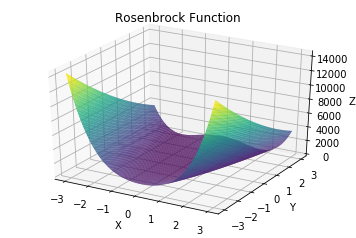

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
n = 100

x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X, Y = np.meshgrid(x,y)
Z = rosen(X, Y)

ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')
plt.show()

#### 2. Gradient Descent

In [81]:
class GradientDescent:
    def __init__(self, grad, eps, tol):
        self.eps = eps
        self.tol = tol
        self.grad = grad
        
    def __Next(self, p):
        x, y = p
        x, y = (x, y) - self.eps*self.grad(x, y)
        return x, y
    
    def Optim(self, p, n):
        result = []
        result.append(p)
        for i in range(n):
            p = self.__Next(p)
            result.append(p)
        result = np.asarray(result)
        return result    

In [206]:
eps = 0.00001
x0, y0 = (1,4)
tol = 1e-5

gd = GradientDescent(rosen_der, eps, tol)
result = gd.Optim((x0,y0), 3000000)

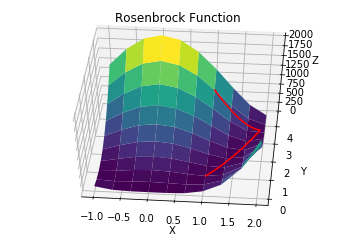

Optimization Result
x = 1.00003, y = 1.00007, z = 0.00000


In [208]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Path
xp = result[:,0]
yp = result[:,1]
zp = rosen(xp, yp)
#ax.scatter3D(x,y,z)
ax.plot3D(xp,yp,zp, c='red')

# Surface
n = 10
x = np.linspace(-1,2,n)
y = np.linspace(0,4.5,n)
X, Y = np.meshgrid(x,y)
Z = rosen(X, Y)
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')
ax.view_init(50,-85)
plt.show()

print('Optimization Result')
print('x = {:.5f}, y = {:.5f}, z = {:.5f}'.format(xp[-1], yp[-1], rosen(xp[-1], yp[-1])))